# Using Pretrained models

In [3]:

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [4]:
import numpy as np

## Using VGG16

In [5]:
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 14s 0us/step


In [57]:
img_path = "/content/drive/MyDrive/Kaggle/dog.jpg"

In [58]:
img = image.load_img(img_path,target_size=(224,224))

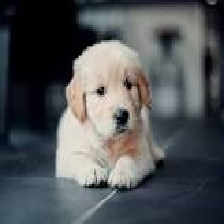

In [8]:
img

In [59]:
img = image.img_to_array(img)

In [60]:
img.shape

(224, 224, 3)

In [61]:
img = np.expand_dims(img,axis =0)
img.shape

(1, 224, 224, 3)

In [24]:
pred = model.predict(img)

1/1 [==============================] - 0s 19ms/step


In [26]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n02101556', 'clumber', 0.97367996),
  ('n02111500', 'Great_Pyrenees', 0.01795321),
  ('n02095889', 'Sealyham_terrier', 0.0019534177),
  ('n02102318', 'cocker_spaniel', 0.0015441066),
  ('n02102480', 'Sussex_spaniel', 0.0010512284)]]

# Using Resnet 50

In [29]:

from tensorflow.keras.applications.resnet50 import ResNet50


In [31]:
model2 = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 3s 0us/step


In [64]:
img = preprocess_input(img)

In [65]:
pred = model2.predict(img)

1/1 [==============================] - 0s 24ms/step


In [66]:
decode_predictions(pred)

[[('n02099601', 'golden_retriever', 0.811475),
  ('n02099712', 'Labrador_retriever', 0.15482987),
  ('n02111500', 'Great_Pyrenees', 0.016155276),
  ('n02104029', 'kuvasz', 0.009314882),
  ('n02101556', 'clumber', 0.003939019)]]

In [38]:
img = image.img_to_array(img)
img = np.expand_dims(img,axis =0)
img.shape

(1, 224, 224, 3)

In [68]:
img_path2 = "/content/drive/MyDrive/Kaggle/taj mahal.jpeg"
img2 = image.load_img(img_path2,target_size = (224,224))


In [69]:
img2=image.img_to_array(img2)
img2.shape

(224, 224, 3)

In [70]:
# img2.reshape(1,224,224,3)
img2 = img2.reshape(1,224,224,3)
img2.shape

(1, 224, 224, 3)

In [71]:
pred2 = model2.predict(img2)

1/1 [==============================] - 0s 23ms/step


In [72]:
decode_predictions(pred2)

[[('n03788195', 'mosque', 0.69312745),
  ('n03028079', 'church', 0.12706064),
  ('n03877845', 'palace', 0.055600714),
  ('n04523525', 'vault', 0.033771683),
  ('n03447447', 'gondola', 0.031777736)]]

In [73]:
img2 = preprocess_input(img2)

In [74]:
pred2 = model2.predict(img2)
decode_predictions(pred2)

1/1 [==============================] - 0s 23ms/step


[[('n03788195', 'mosque', 0.8192567),
  ('n03877845', 'palace', 0.16755854),
  ('n03447447', 'gondola', 0.0036899124),
  ('n03781244', 'monastery', 0.0024272487),
  ('n04523525', 'vault', 0.0022426492)]]

# Hypertuning the pretrained Models

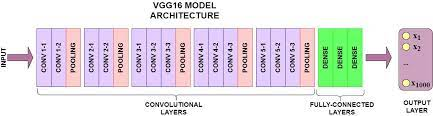

Hypertuning VGG16

In [80]:
conv_base = VGG16(include_top=False,
                  weights='imagenet',
                  input_shape =(150,150,3))

In [81]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [83]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [86]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [87]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
conv_base.trainable = False

In [89]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/drive/MyDrive/Kaggle/dogs_vs_cats/train',
    batch_size = 32,
    image_size = (150,150),
    labels = 'inferred',
    label_mode = 'int'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r"/content/drive/MyDrive/Kaggle/dogs_vs_cats/test",
    batch_size = 32,
    image_size = (150,150),
    labels = "inferred",
    label_mode = "int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [90]:
# Normalizing

def process(image,label):
  tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [91]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [92]:
model.fit(train_ds,epochs=2,validation_data = validation_ds)

Epoch 1/2
 10/625 [..............................] - ETA: 1:09:25 - loss: 10.5118 - accuracy: 0.7594

KeyboardInterrupt: ignored

In [93]:
conv_base.layers

In [94]:
len(conv_base.layers)

19

In [96]:
for layer in conv_base.layers:
  print(layer.name)

input_5
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [98]:
conv_base.trainable=True

set_trainable = False

for layer in conv_base.layers:
  if layer.name=="block5_conv1":
    set_trainable=True
  if set_trainable:
    layer.trainable =True
  else:
    layer.trainable=False

In [99]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [100]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation ='sigmoid'))

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               2097408   
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [102]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [103]:

model.fit(train_ds,epochs=1,validation_data = validation_ds)

 99/625 [===>..........................] - ETA: 55:39 - loss: 5.9061 - accuracy: 0.5133

KeyboardInterrupt: ignored